In [1]:
using Distributions
using RCall
using Roots
using StatsFuns
using StatsPlots

default(fmt=:png, titlefontsize=10)
@rlibrary stats
safediv(x, y) = x==0 ? x : y==Inf ? zero(y) : x/y
x ⪅ y = x < y || x ≈ y

⪅ (generic function with 1 method)

In [2]:
function pvalue_wilson(n, k, p)
    p̂ = k/n
    SE = √(p*(1-p)/n)
    z = safediv(p̂ - p, SE)
    2(1 - cdf(Normal(), abs(z)))
end

pvalue_wilson(30, 25, 2/3)

0.052807511416113506

In [3]:
rcopy(prop_test(25, 30, p=2/3, correct=false))[:p_value]

0.05280751141611382

In [4]:
function pvalue_wald(n, k, p)
    p̂ = k/n
    SEhat = √(p̂*(1-p̂)/n)
    z = safediv(p̂ - p, SEhat)
    2(1 - cdf(Normal(), abs(z)))
end

pvalue_wald(30, 25, 2/3)

0.01430587843542952

In [5]:
function pvalue_logit_wald(n, k, p)
    p̂ = k/n
    SEhatinv = √(n*p̂*(1-p̂))
    z = (logit(p̂) - logit(p))*SEhatinv
    2(1 - cdf(Normal(), abs(z)))
end

pvalue_logit_wald(30, 25, 2/3)

0.061432368349303657

In [6]:
function pvalue_bayes(n, k, p; conjprior=(0.5, 0.5))
    α, β = conjprior
    beta = Beta(α+k, β+n-k)
    min(1, 2cdf(beta, p), 2ccdf(beta, p))
end

pvalue_bayes(30, 25, 2/3)

0.04281847602216921

In [7]:
function pvalue_clopper_pearson(n, k, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

pvalue_clopper_pearson(30, 25, 2/3)

0.07090834363259803

In [8]:
function pvalue_sterne(n, k, p)
    bin = Binomial(n, p)
    p0 = pdf(bin, k)
    sum(pdf(bin, i) for i in support(bin) if pdf(bin, i) ⪅ p0)
end

pvalue_sterne(30, 25, 2/3)

0.05424917304313229

In [9]:
rcopy(binom_test(25, 30, p=2/3))[:p_value]

0.054249173043132225

In [10]:
function ci(pvaluefunc, n, k; α = 0.05)
    f(p) = pvaluefunc(n, k, p) - α
    find_zeros(f, 1e-4, 1 - 1e-4)
end

@show ci(pvalue_wilson, 30, 25)
@show ci(pvalue_wald, 30, 25)
@show ci(pvalue_logit_wald, 30, 25)
@show ci(pvalue_bayes, 30, 25)
@show ci(pvalue_clopper_pearson, 30, 25)
@show ci(pvalue_sterne, 30, 25)
@show rcopy(prop_test(25, 30, p=2/3, correct=false))[:conf_int]
@show rcopy(binom_test(25, 30, p=2/3))[:conf_int]
;

ci(pvalue_wilson, 30, 25) = [0.6643564949358396, 0.9266345762815145]
ci(pvalue_wald, 30, 25) = [0.6999746756567969, 0.9666919910098697]
ci(pvalue_logit_wald, 30, 25) = [0.6568426890864915, 0.9288806130254662]
ci(pvalue_bayes, 30, 25) = [0.6725722483365387, 0.9334260464325449]
ci(pvalue_clopper_pearson, 30, 25) = [0.6527883011658561, 0.9435783035319284]
ci(pvalue_sterne, 30, 25) = [0.6524485571942349, 0.9319444264196155]
(rcopy(prop_test(25, 30, p = 2 / 3, correct = false)))[:conf_int] = [0.6643564949358398, 0.9266345762815145]
(rcopy(binom_test(25, 30, p = 2 / 3)))[:conf_int] = [0.6527883011658562, 0.9435783035319285]


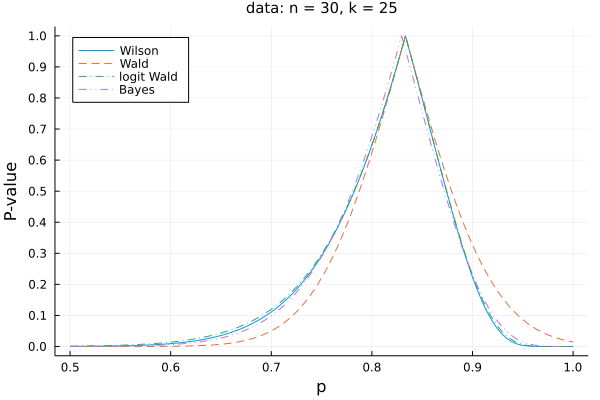

In [11]:
n, k = 30, 25
plot(p -> pvalue_wilson(n, k, p), 0.5, 1; label="Wilson")
plot!(p -> pvalue_wald(n, k, p); label="Wald", ls=:dash)
plot!(p -> pvalue_logit_wald(n, k, p); label="logit Wald", ls=:dashdot)
plot!(p -> pvalue_bayes(n, k, p); label="Bayes", ls=:dashdotdot)
plot!(legend=:topleft)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
title!("data: n = $n, k = $k")

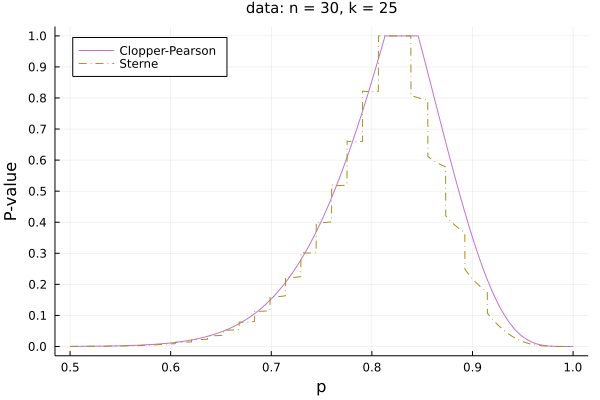

In [12]:
n, k = 30, 25
plot(p -> pvalue_clopper_pearson(n, k, p), 0.5, 1; label="Clopper-Pearson", c=4)
plot!(p -> pvalue_sterne(n, k, p); label="Sterne", ls=:dashdot, c=5)
plot!(legend=:topleft)
plot!(xguide="p", yguide="P-value")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
title!("data: n = $n, k = $k")